#Intrucciones Reto 4:

Con la base de datos de marketing_campaign.csv

In [1]:
#Conectar con Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
import pandas as pd # Manejo de Data Frame
import numpy as np # Manejo matricial
import warnings # Omitir warnings
warnings.filterwarnings("ignore") # Ignorar warning (me estresan los warnings >:|)
# librerías para Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Librerías para clustering
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import (KMeans, AgglomerativeClustering, DBSCAN)
from sklearn.decomposition import PCA # Análisis de componentes principales
from scipy.cluster.hierarchy import dendrogram,  linkage # Dendograma
# Score de silueta
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler # estandarizar variables

In [38]:
#Cargamos la base de datos
datos_marketing = pd.read_csv("/content/drive/MyDrive/Aprendizaje no supervisador para el analisis de datos /Bases de datos/marketing_campaign.csv", sep="\t")
datos_marketing=datos_marketing.dropna()
datos_marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [39]:
datos_marketing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

## 1. Seleccione solo las variables numéricas.
 ¿Qué se puede considerar como variable numérica?  (elimine los datos faltantes).

Una variable númerica es aquella que toma valores cuantitativos.
- Variables numéricas continuas: Estas variables pueden tomar cualquier valor. (Decimales).
- Variables numéricas discretas: son aquellas que toman valores específicos. (Enteros).


In [40]:
numericos = datos_marketing.drop(['Education', 'Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Recency'], axis=1)
print(datos_marketing.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [41]:
numericos.isnull().sum()

,0
Income,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0
NumDealsPurchases,0
NumWebPurchases,0
NumCatalogPurchases,0


##2. Realice un análisis de correlaciones entre variables.
 Use solo un método y correlación múltiple. Comente que observa.

### Coeficiente de correlación de Kendall

In [42]:
numericos.corr("kendall")

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
Income,1.000000,0.632614,0.399106,0.618775,0.397178,0.391346,0.341635,-0.143148,0.402639,0.618513,0.544578,-0.485554,-0.012051,0.182554,0.323453,0.269955,0.085779,-0.025211,0.131576
MntWines,0.632614,1.000000,0.355030,0.619960,0.359565,0.348726,0.394415,0.048367,0.570764,0.645686,0.621260,-0.278469,0.028004,0.254377,0.300002,0.247188,0.113528,-0.031478,0.162201
MntFruits,0.399106,0.355030,1.000000,0.532194,0.550344,0.542203,0.413511,-0.082540,0.350774,0.484286,0.435861,-0.321874,0.007065,0.023234,0.197142,0.146705,0.002116,-0.010367,0.122868
MntMeatProducts,0.618775,0.619960,0.532194,1.000000,0.540642,0.519801,0.457879,-0.010880,0.518283,0.685633,0.596073,-0.353870,0.006864,0.112925,0.271732,0.233000,0.051589,-0.020767,0.182088
MntFishProducts,0.397178,0.359565,0.550344,0.540642,1.000000,0.544090,0.409233,-0.090923,0.345842,0.503529,0.430649,-0.332724,-0.020859,0.002520,0.181180,0.174974,-0.000480,-0.024224,0.094601
MntSweetProducts,0.391346,0.348726,0.542203,0.519801,0.544090,1.000000,0.394494,-0.079877,0.345676,0.482933,0.435481,-0.328704,-0.013218,0.005291,0.212734,0.184205,-0.000930,-0.021679,0.113081
MntGoldProds,0.341635,0.394415,0.413511,0.457879,0.409233,0.394494,1.000000,0.070664,0.423909,0.495854,0.392369,-0.185400,0.114825,0.054475,0.156956,0.145124,0.055875,-0.029109,0.149967
NumDealsPurchases,-0.143148,0.048367,-0.082540,-0.010880,-0.090923,-0.079877,0.070664,1.000000,0.230311,-0.027142,0.083514,0.320012,-0.012911,-0.000719,-0.230771,-0.160379,-0.047755,0.015205,-0.032090
NumWebPurchases,0.402639,0.570764,0.350774,0.518283,0.345842,0.345676,0.423909,0.230311,1.000000,0.475236,0.522876,-0.057476,0.027982,0.156646,0.150883,0.158864,0.031761,-0.019097,0.148417
NumCatalogPurchases,0.618513,0.645686,0.484286,0.685633,0.503529,0.482933,0.495854,-0.027142,0.475236,1.000000,0.547237,-0.417350,0.090193,0.164794,0.283625,0.262881,0.091247,-0.027319,0.202947


In [43]:
numericos.corr()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
Income,1.000000,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,0.133047
MntWines,0.578650,1.000000,0.387024,0.568860,0.397721,0.390326,0.392731,0.008886,0.553786,0.634753,0.640012,-0.321978,0.061463,0.373143,0.473550,0.351417,0.206185,-0.039470,0.246299
MntFruits,0.430842,0.387024,1.000000,0.547822,0.593431,0.571606,0.396487,-0.134512,0.302039,0.486263,0.458491,-0.418729,0.014424,0.006396,0.212871,0.191816,-0.009980,-0.005324,0.122443
MntMeatProducts,0.584633,0.568860,0.547822,1.000000,0.573574,0.535136,0.359446,-0.121308,0.307090,0.734127,0.486006,-0.539484,0.018438,0.091618,0.376867,0.313076,0.043521,-0.023782,0.237746
MntFishProducts,0.438871,0.397721,0.593431,0.573574,1.000000,0.583867,0.427142,-0.143241,0.299688,0.532757,0.457745,-0.446423,-0.000219,0.016105,0.196277,0.261608,0.002345,-0.021220,0.108145
MntSweetProducts,0.440744,0.390326,0.571606,0.535136,0.583867,1.000000,0.357450,-0.121432,0.333937,0.495136,0.455225,-0.422371,0.001780,0.029313,0.259230,0.245102,0.010188,-0.022641,0.116170
MntGoldProds,0.325916,0.392731,0.396487,0.359446,0.427142,0.357450,1.000000,0.051905,0.407066,0.442428,0.389180,-0.247691,0.124958,0.024015,0.181397,0.170132,0.050734,-0.031133,0.140332
NumDealsPurchases,-0.083101,0.008886,-0.134512,-0.121308,-0.143241,-0.121432,0.051905,1.000000,0.241440,-0.012118,0.066107,0.346048,-0.023135,0.016077,-0.184253,-0.127374,-0.037981,0.000497,0.003451
NumWebPurchases,0.387878,0.553786,0.302039,0.307090,0.299688,0.333937,0.407066,0.241440,1.000000,0.386868,0.516240,-0.051226,0.042958,0.162932,0.141189,0.159292,0.034829,-0.016642,0.151431
NumCatalogPurchases,0.589162,0.634753,0.486263,0.734127,0.532757,0.495136,0.442428,-0.012118,0.386868,1.000000,0.517840,-0.522004,0.104345,0.140182,0.322471,0.309026,0.099915,-0.020839,0.219914


<Axes: >

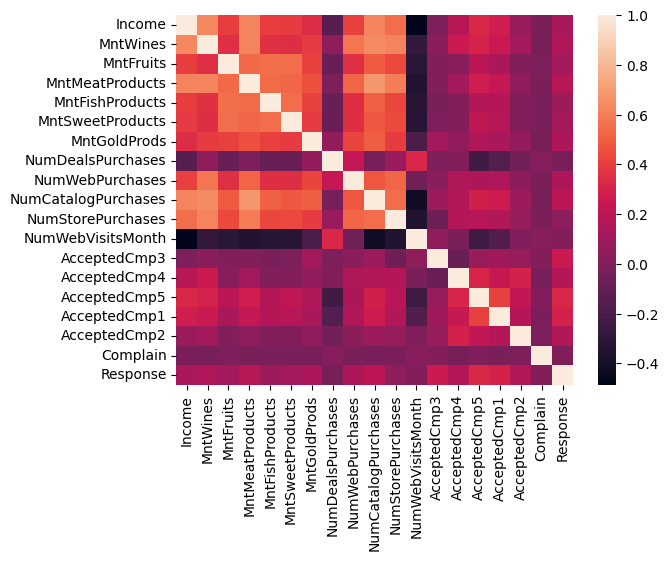

In [44]:
sns.heatmap(numericos.corr("kendall"))

**Observaciones:**

- En la variable Income se puede ver que hay una correlación muy positiva para las variables NumCatalogPruchases lo que siguiere que los clientes tienden a comparar más por catálogo. Lo mismo sucede con relación a las variables MntWines, MeanProducts y StorePurchases.
- La relación entre las categorías de productos es positiva, lo que indica que los clietes compran uno de estos productos y también gastan en otros.
- La relación del NumWebVisitsMonth con las variables de los productos, y las variables compra por catálogo y compras en la tienda es una relación negativa. Lo que puede significar que las variables no estan relacionas entre sí.

<Axes: >

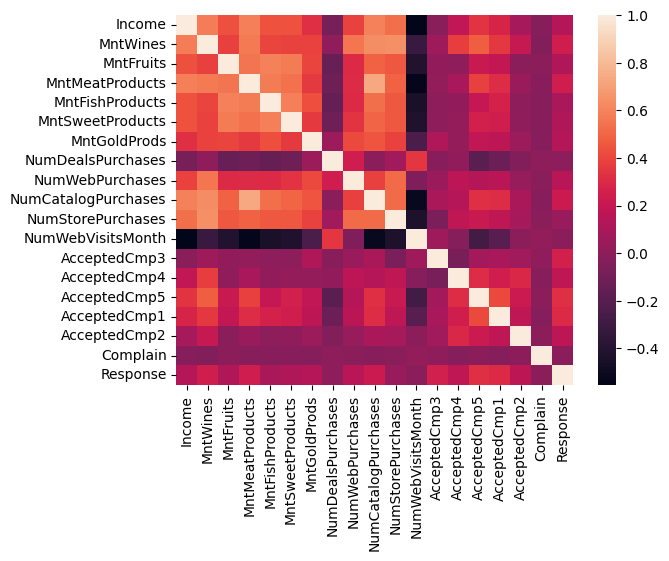

In [45]:
sns.heatmap(numericos.corr())

**Observaciones:**
- No se presenta mucha diferencia con la correlación de Kendall.
- Por lo que se puede ver en la correlación de Kendall los colores tienden a tener una tonalidad más intensa, lo que hace que las correlaciones no sean tan precisas.

### Correlación múltiple

In [46]:
def correlacion_multiple(numericos):
  S= numericos.cov()
  S_inv= np.linalg.inv(S)
  Vector_Corre_Multiples = pd.Series((1 - 1/ (np.diag(S) * np.diag(S_inv))), index= numericos.columns)
  return Vector_Corre_Multiples
correlacion_multiple(numericos)

,0
Income,0.534650
MntWines,0.696135
MntFruits,0.486398
MntMeatProducts,0.657731
MntFishProducts,0.525570
MntSweetProducts,0.477568
MntGoldProds,0.330073
NumDealsPurchases,0.265690
NumWebPurchases,0.480946
NumCatalogPurchases,0.670247


**Observaciones:**

Se devuelve un vecto con los coeficientes de correlación múltiple para cada variable en el conjunto de datos.

|$R^2 = 0$: El modelo no explica ninguna variación de los datos, es decir, el modelo es tan bueno como la media de los datos.

1. MntWines con un valor de 0.6961 indica que el gato en vino tiene una fuerte correlación con las demás variables. Los clientes que compran vino también tienden a gastar en otros productos.
2. NumCatalogPurchases con un valor de 0.6702 también tiene una alta correlación, lo que podría sugerir que los clienten que comprar por catálogo tiene una alta relación con los otros canales de compra o también tienden a gastar en estos productos.
3. Las correlaciones de las campañas son las más bajas, lo que quiere decir que el hecho de que un cliente acepte o no una campaña no está proporcionalmente relaciona con las demás variables, si no que esta relacionado con otros factores.
4. Por otro lado, Complain tiene un valor de correlación de 0.003 es el más bajo, indicando que las quejas de los clientes no están relacionas con las variables del conjunto de datos. Las quejas pueden venir de otros factore como servicio o satisfacción.

##3. Con el algoritmo K-means  y clúster jerárquico determine el número de clústeres.
 Obtenga la distribución de etiquetas (solo la frecuencia de cada clúster).

In [47]:
#Estandarización de las varibles
scaler = StandardScaler() # Función de estandarización
scaled_features = scaler.fit_transform(numericos)

### K-Means

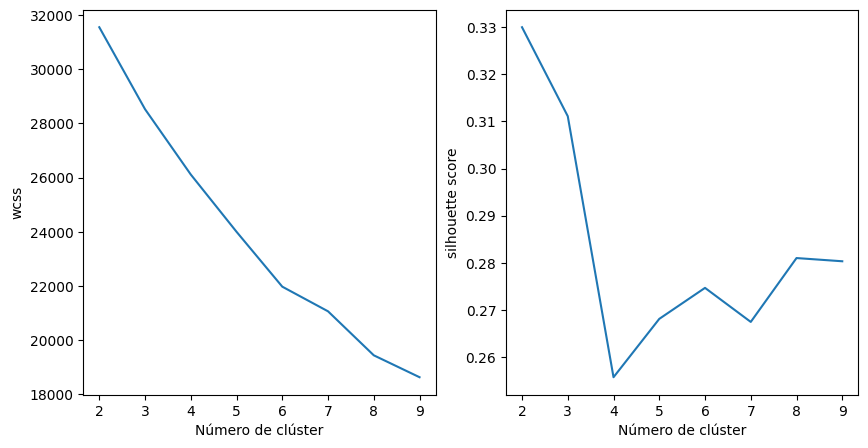

In [48]:
silueta_score=[]
wcss =[]
n_clusters= range( 2,10)
for k in n_clusters:
  k_means=KMeans(k)
  k_means.fit(scaled_features)
  wcss.append(k_means.inertia_ )
  silueta = silhouette_score(scaled_features, k_means.labels_)
  silueta_score.append(silueta)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(n_clusters,wcss)
axs[0].set_xlabel("Número de clúster" )
axs[0].set_ylabel("wcss" )
axs[1].plot( n_clusters,silueta_score)
axs[1].set_xlabel("Número de clúster" )
axs[1].set_ylabel("silhouette score" )
plt.show()

In [49]:
k_means=KMeans(3, random_state=123  )
k_means.fit(scaled_features )
numericos["labels_k_means"]= k_means.labels_

**Análisis:**
- La interpretación del número de clústeres es un poco confusa, pero por lo que se puede visualizar en el método del codo se encuentran más prominentes en 3, 5 y 7.
- Por otro lado, en el score de silueta los puntos más altos son 2, 3 y 7.
- Según esto, la elección de clústes más eficaz podría ser 3 ya que en los dos métodos es un número óptimo.

###Hierarchical clustering

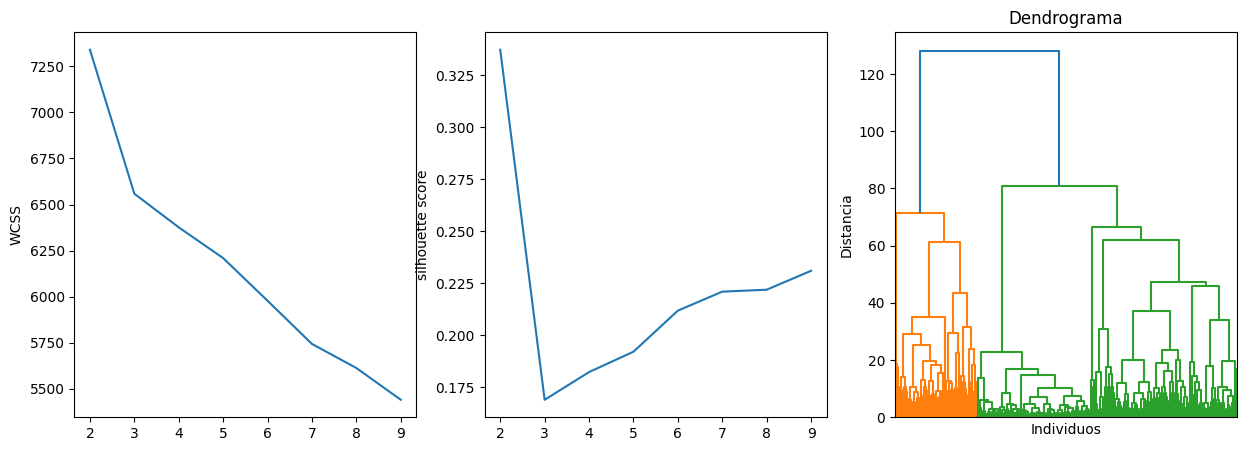

In [50]:
silueta =[]
wcss =[]
n_cluster=range(2,10)
for i in n_cluster:
  jerarquico = AgglomerativeClustering(i)
  jerarquico.fit(scaled_features)
  scaled_temp= pd.DataFrame(scaled_features)
  scaled_temp["labels"]=jerarquico.labels_
  centros= scaled_temp.groupby("labels").mean()  # obteniendo centros
  argmin, distance =pairwise_distances_argmin_min(scaled_features,centros  )  # obteniendo distancias
  wcss.append(np.sum(distance) )
  score = silhouette_score(scaled_features,jerarquico.labels_ )
  silueta.append(score)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].plot( (n_cluster), wcss  )
axes[0].set_ylabel("WCSS")
axes[1].plot( (n_cluster), silueta  )
axes[1].set_ylabel("silhouette score")

# visualización clustering jerarquico
dist_matrix = linkage(scaled_features, method='ward')
# Visualizar el dendrograma
dendrogram(dist_matrix,no_labels=True)
axes[2].set_title('Dendrograma')
axes[2].set_xlabel('Individuos')
axes[2].set_ylabel('Distancia')
plt.show()

In [51]:
hc=AgglomerativeClustering(3)
hc.fit(scaled_features )
numericos["labels_hc"]= hc.labels_

**Análisis:**
- En el análisis del codo se puede notar una alta prominencia en 3 y en 7.
- El en método de silueta 2 y 7 son los más altos y tres es el más bajo de todo, lo que hace dudar al momento de elergilo.
- Por último, el punto de corte en el Dendrograma sería de 3 donde se observa una mejor repartición de clústeres.

,proportion
labels_hc,
1,42.689531
2,33.122744
0,24.187726


Text(0.5, 1.0, 'Clúster con Hierarchical clustering')

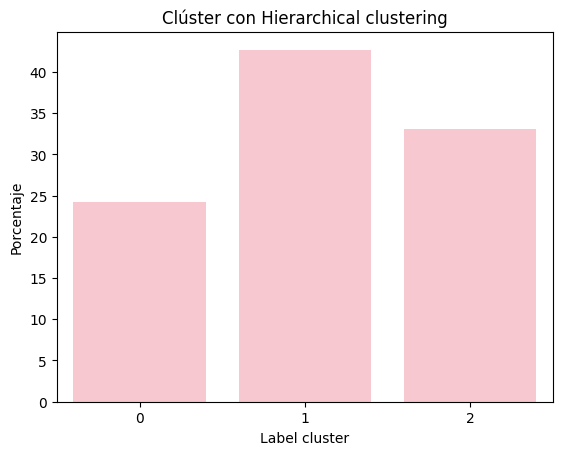

In [52]:
display( numericos["labels_hc"].value_counts(normalize=True)*100)
sns.barplot(numericos["labels_hc"].value_counts(normalize=True)*100, color='pink')
plt.xlabel("Label cluster")
plt.ylabel("Porcentaje")
plt.title("Clúster con Hierarchical clustering")

**Distribución de etiquetas:**
- **Clúster 1:** 42.68% de los datos
- **Clúster 2:** 33.12% de los datos
- **Clúster 0**: 24.18% de los daots

## 4. Implemente solo una técnica de detección de datos atípicos vista en clase.
Distancias o isolation forest cree un data frame para los datos sin atípicos

### Isolation Forest

In [53]:
from sklearn.ensemble import IsolationForest
atipicos = IsolationForest(contamination=0.01, random_state=42)
atipicos.fit(numericos)
atipico_isolation_forest = atipicos.predict(numericos)

# Convert the NumPy array to a Pandas Series to use value_counts()
atipico_isolation_forest = pd.Series(atipico_isolation_forest)
atipico_isolation_forest.value_counts()

,count
1,2193
-1,23


In [54]:
#Elinimación de datos atípicos
numericos["atipico_isolation_forest"] = atipico_isolation_forest
datos_sin_atipicos = numericos[numericos["atipico_isolation_forest"] == 1]
datos_sin_atipicos.head()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,labels_k_means,labels_hc,atipico_isolation_forest
0,58138.0,635,88,546,172,88,88,3,8,10,...,0,0,0,0,0,0,1,2,0,1.0
1,46344.0,11,1,6,2,1,6,2,1,1,...,0,0,0,0,0,0,0,1,2,1.0
2,71613.0,426,49,127,111,21,42,1,8,2,...,0,0,0,0,0,0,0,2,1,1.0
3,26646.0,11,4,20,10,3,5,2,2,0,...,0,0,0,0,0,0,0,1,2,1.0
4,58293.0,173,43,118,46,27,15,5,5,3,...,0,0,0,0,0,0,0,1,1,1.0


##5. Para los datos (sin eliminar atípicos) y los datos iniciales realice lo siguiente (es decir para los dos conjuntos de datos):



###  a. Implemente reducción de dimensionalidad con PCA, determine el número de componentes, describa textualmente por qué.


#### Datos Iniciales (numericos)

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

numericos = numericos.dropna()

num_variables = numericos.shape[1]
scale_feature = StandardScaler().fit_transform(numericos)
pca = PCA(n_components=num_variables)
pca.fit(scale_feature)

PCA(n_components=22)

In [56]:
pd.DataFrame(pca.fit_transform(scale_feature)).corr()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.000000e+00,1.083108e-16,1.076653e-16,7.978280e-18,-9.655227e-17,-7.139274e-17,5.182108e-17,-4.675704e-17,-6.956404e-17,-7.836826e-17,...,-1.494206e-19,9.332065e-17,-9.426794e-17,9.989414e-17,-1.774032e-16,5.275792e-17,5.837520e-17,-2.458334e-17,-4.305369e-16,9.822542e-17
1,1.083108e-16,1.000000e+00,-5.790583e-17,6.564255e-17,-3.370583e-17,6.353412e-17,4.124158e-17,-1.658262e-16,-1.323878e-16,1.450064e-17,...,-3.011023e-17,-4.439614e-17,1.989882e-16,1.263089e-16,1.830613e-17,6.657925e-17,-2.610396e-18,-1.203218e-16,-1.686943e-16,5.430380e-17
2,1.076653e-16,-5.790583e-17,1.000000e+00,1.008013e-16,1.308579e-17,3.695391e-17,-9.921342e-17,3.626723e-16,2.145835e-16,-1.690649e-16,...,-1.424629e-16,2.362898e-16,-1.454792e-16,2.110787e-16,-1.732128e-17,2.291874e-16,2.154526e-16,-5.692280e-17,1.478395e-17,-1.894487e-18
3,7.978280e-18,6.564255e-17,1.008013e-16,1.000000e+00,2.322874e-17,8.835449e-17,-6.114934e-18,-6.293842e-18,-8.382295e-17,5.915085e-17,...,1.881206e-16,-1.218033e-16,7.176731e-17,-1.337514e-16,5.189684e-17,-8.209084e-17,-1.913647e-16,1.904753e-16,-2.385244e-16,9.977837e-17
4,-9.655227e-17,-3.370583e-17,1.308579e-17,2.322874e-17,1.000000e+00,8.228284e-17,-2.461546e-16,2.245320e-16,-1.220313e-16,5.792840e-17,...,-3.123540e-17,-5.550093e-17,-1.890324e-16,2.798771e-16,1.782882e-16,3.241065e-16,-3.928704e-17,3.005031e-16,-1.826299e-16,-3.756424e-16
5,-7.139274e-17,6.353412e-17,3.695391e-17,8.835449e-17,8.228284e-17,1.000000e+00,-5.075874e-17,-2.251958e-16,-1.365006e-16,1.120282e-16,...,6.484078e-17,-3.186687e-16,2.942037e-17,-3.830344e-17,1.811530e-17,-3.774820e-17,-1.108948e-16,1.856466e-16,-4.593127e-17,3.423546e-16
6,5.182108e-17,4.124158e-17,-9.921342e-17,-6.114934e-18,-2.461546e-16,-5.075874e-17,1.000000e+00,6.287992e-16,1.150665e-16,7.242232e-17,...,-3.135694e-16,1.101486e-16,-2.778284e-16,1.236102e-16,-2.757500e-16,1.581522e-16,-7.665164e-17,8.313138e-17,1.579900e-16,1.375952e-16
7,-4.675704e-17,-1.658262e-16,3.626723e-16,-6.293842e-18,2.245320e-16,-2.251958e-16,6.287992e-16,1.000000e+00,-1.990475e-16,3.797627e-17,...,-6.490003e-17,6.207089e-17,-2.485070e-16,-3.079393e-17,1.496845e-16,1.115911e-16,-3.595056e-17,-3.529240e-17,7.607947e-17,-2.443928e-16
8,-6.956404e-17,-1.323878e-16,2.145835e-16,-8.382295e-17,-1.220313e-16,-1.365006e-16,1.150665e-16,-1.990475e-16,1.000000e+00,-1.921827e-16,...,-1.738530e-17,-4.447520e-17,-1.807192e-16,-1.262894e-16,-1.602571e-16,2.928699e-17,8.493801e-17,-9.564054e-17,-7.234421e-17,-1.059266e-16
9,-7.836826e-17,1.450064e-17,-1.690649e-16,5.915085e-17,5.792840e-17,1.120282e-16,7.242232e-17,3.797627e-17,-1.921827e-16,1.000000e+00,...,-2.603572e-16,-1.451312e-16,-1.630628e-16,2.558678e-17,-4.703345e-16,1.056195e-16,2.464650e-18,1.161532e-16,1.686671e-16,2.266183e-16


Valor propio de la componente

In [57]:
pca.explained_variance_

array([7.11990857, 2.43168056, 1.66000844, 1.28790304, 1.00901309,
       0.99619725, 0.89031515, 0.79928943, 0.73567796, 0.69080032,
       0.63714167, 0.59493631, 0.55700606, 0.44768153, 0.42921203,
       0.38797418, 0.36054885, 0.25046317, 0.23097075, 0.19780091,
       0.17289507, 0.12261216])

Proporción de varianza explicada por cada componente

In [58]:
pd.Series(pca.explained_variance_ratio_)

,0
0,0.323485
1,0.110481
2,0.075421
3,0.058514
4,0.045843
5,0.045261
6,0.040450
7,0.036315
8,0.033425
9,0.031386


Varianza explicada acumulada

In [59]:
pca.explained_variance_ratio_.cumsum()

array([0.32348463, 0.43396517, 0.50938569, 0.56790004, 0.61374336,
       0.6590044 , 0.69945482, 0.73576959, 0.76919425, 0.80057995,
       0.82952772, 0.85655795, 0.88186486, 0.90220475, 0.92170549,
       0.93933264, 0.95571375, 0.96709324, 0.97758713, 0.98657398,
       0.99442926, 1.        ])

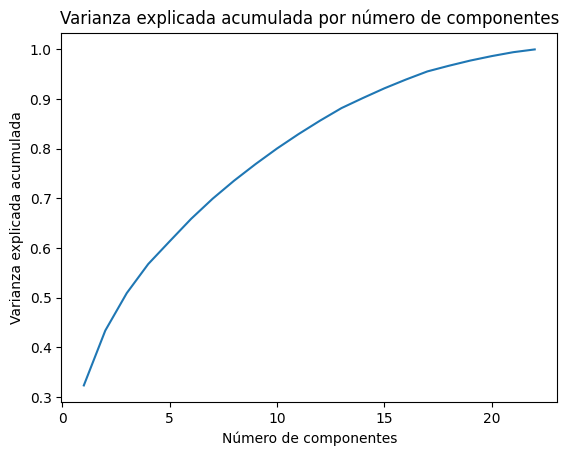

In [60]:
sns.lineplot(x=range(1, num_variables + 1), y=pca.explained_variance_ratio_.cumsum())
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por número de componentes')
plt.show()

Generalmente se busca el número de componentes que expliquen entre un 80 a 90% de varianza explicada.

Se observa que a partir del componente 9 se llega a un 76.91% de variabilidad, en el componente 10 llega al 80% y a partir del 12  se obtiene un 85.65% de variabilidad.

Extraer Componentes

In [61]:
pca = PCA(13)
pca.fit(scale_feature)

PCA(n_components=13)

- Lo que se visualiza es la suma acumulada de la varianza explicada por cada uno de los componentes principales.
- Estos componentes están ordenados de manera que el primero captura la mayor parte de la varianza en los datos.
- Indica qué tanto de la información original (dispersión o variabilidad) de los datos es capturada por ese componente.

In [62]:
pd.DataFrame(pca.components_.T, index=numericos.columns)

,0,1,2,3,4,5,6,7,8,9,10,11,12
Income,0.322266,-0.006778,-0.040142,-0.151952,0.002786,0.016508,0.048266,0.257992,-0.013587,0.019977,0.036705,-0.006216,-0.074771
MntWines,0.292489,0.121713,0.215694,-0.140298,0.021125,-0.017253,0.040772,0.200388,-0.105317,-0.114364,-0.061527,-0.053473,-0.101987
MntFruits,0.258543,-0.141395,-0.136441,0.113869,-0.014351,0.026770,-0.081993,-0.338508,0.038886,0.023483,-0.245059,-0.148954,0.159326
MntMeatProducts,0.303707,-0.015360,-0.132922,0.035827,0.015119,-0.006508,-0.069548,0.176972,0.194743,0.233561,0.057379,0.002907,0.059358
MntFishProducts,0.267446,-0.136563,-0.150703,0.099454,-0.013850,-0.017382,-0.070765,-0.354087,0.071406,-0.019021,0.046076,-0.017786,0.192563
MntSweetProducts,0.259654,-0.106820,-0.131939,0.068843,-0.024852,0.002026,-0.140443,-0.335532,0.031189,-0.014455,-0.115806,-0.388976,0.086474
MntGoldProds,0.212869,-0.087409,0.151529,0.227888,-0.016002,-0.083059,0.023504,-0.267149,-0.485290,0.040731,0.067172,0.693778,0.093142
NumDealsPurchases,-0.037551,-0.092648,0.580835,0.022323,0.028393,-0.007059,-0.279999,0.042764,0.094493,0.492867,0.284582,-0.143307,0.314609
NumWebPurchases,0.210008,-0.076596,0.451842,0.000852,0.001838,0.008740,-0.126074,-0.022810,-0.175098,-0.262400,-0.139880,-0.127708,-0.375298
NumCatalogPurchases,0.306538,-0.025646,0.007548,0.051566,0.007882,-0.005241,0.073298,0.248302,0.102791,0.197245,0.195962,0.088648,0.151831


|Cada valor en la tabla indica el peso o influencia que una variable tiene en un componente principal en particular.
- Valores positivos: indican que la variable tiene una relación directa con el componente.
- Valores negativos: indican que la variable tiene una relación inversa con el componente.



**Componente 0:** En este las variables que tienen una mayor relación son Income con (0.322266) y MntMeatProducts	(0.303707).

**Componente 1:** En este componente, las variables como AcceptedCmp5 (0.438828) y AcceptedCmp4 (0.321823) tienen una alta relación con el componente.

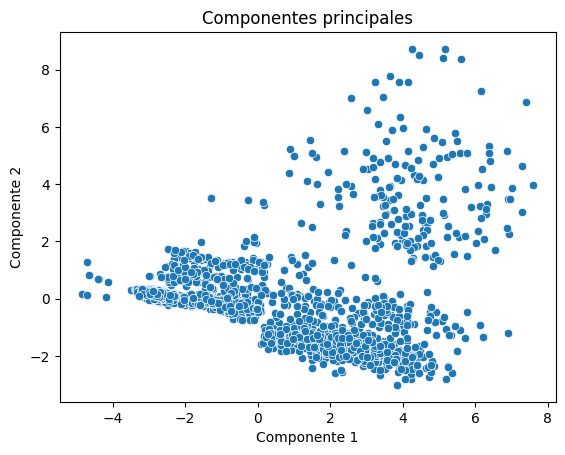

In [63]:
z_componentes= pca.fit_transform( scale_feature)

sns.scatterplot( x=z_componentes[:,0], y=z_componentes[:,1])
plt.title("Componentes principales")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()


#### Datos sin Atípicos:

In [64]:
num_variables1 = datos_sin_atipicos.shape[1]
scale_feature1 = StandardScaler().fit_transform(datos_sin_atipicos)
pca1 = PCA(n_components=num_variables1)
pca1.fit(scale_feature1)

PCA(n_components=22)

In [70]:
pd.DataFrame(pca1.fit_transform(scale_feature1)).corr()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.000000e+00,1.244398e-16,5.022655e-17,2.173496e-17,-1.030126e-16,1.497543e-16,3.148039e-16,2.737523e-17,-8.489007e-18,-2.754442e-17,...,3.449766e-17,5.065702e-18,-5.813190e-17,2.100527e-16,-8.965869e-17,-1.448428e-16,5.631649e-17,4.185815e-17,4.911043e-17,NaN
1,1.244398e-16,1.000000e+00,1.965810e-17,5.980138e-17,-8.060683e-17,3.832635e-17,-5.141481e-17,-9.960138e-17,-1.507529e-16,-1.630064e-17,...,1.645369e-16,-1.986424e-16,-8.370857e-17,1.318416e-17,4.228855e-17,8.013108e-17,8.314959e-17,-2.366529e-16,9.046667e-17,NaN
2,5.022655e-17,1.965810e-17,1.000000e+00,-7.617572e-16,-5.112026e-17,-2.312678e-17,-6.574345e-16,1.033924e-16,1.336055e-16,4.128800e-17,...,-1.274575e-16,2.005327e-16,-1.363846e-16,1.953117e-16,2.047649e-16,-2.244441e-16,5.713415e-17,-4.605292e-18,2.272833e-17,NaN
3,2.173496e-17,5.980138e-17,-7.617572e-16,1.000000e+00,-4.291332e-18,-6.234595e-17,6.166208e-16,8.416565e-17,-9.236279e-19,1.424493e-16,...,-1.555755e-17,-6.963791e-17,7.700218e-17,3.360610e-17,-3.095551e-17,3.171416e-16,-1.950025e-16,-4.535833e-16,-1.214117e-16,NaN
4,-1.030126e-16,-8.060683e-17,-5.112026e-17,-4.291332e-18,1.000000e+00,5.179268e-16,-8.603112e-17,7.623231e-17,-1.012087e-16,-3.916821e-17,...,-8.360086e-17,9.589515e-17,-1.025379e-16,-1.708751e-16,-1.833560e-16,-1.759235e-16,-1.705950e-16,1.739864e-16,-6.245606e-16,NaN
5,1.497543e-16,3.832635e-17,-2.312678e-17,-6.234595e-17,5.179268e-16,1.000000e+00,4.217547e-16,-4.201558e-17,7.575059e-17,1.059820e-16,...,3.804359e-17,1.167257e-17,-1.756307e-17,1.322628e-16,7.333254e-17,1.979133e-16,2.241290e-16,1.564160e-16,6.072430e-16,NaN
6,3.148039e-16,-5.141481e-17,-6.574345e-16,6.166208e-16,-8.603112e-17,4.217547e-16,1.000000e+00,-2.440013e-16,-2.063720e-16,-6.103554e-17,...,6.148717e-17,2.523660e-18,8.087945e-17,-1.597078e-16,3.818036e-17,3.037598e-16,-1.037147e-16,-4.869385e-16,-1.238546e-16,NaN
7,2.737523e-17,-9.960138e-17,1.033924e-16,8.416565e-17,7.623231e-17,-4.201558e-17,-2.440013e-16,1.000000e+00,6.735704e-16,-3.687444e-16,...,-1.851957e-16,-1.862313e-16,7.993533e-16,2.335337e-16,-1.946674e-16,1.796907e-16,1.874977e-16,9.720277e-17,3.018273e-16,NaN
8,-8.489007e-18,-1.507529e-16,1.336055e-16,-9.236279e-19,-1.012087e-16,7.575059e-17,-2.063720e-16,6.735704e-16,1.000000e+00,-1.461008e-15,...,-1.721033e-16,-1.699761e-16,5.180666e-16,-1.531792e-16,-1.889421e-16,-2.148986e-16,2.078864e-16,-6.823145e-17,1.801094e-16,NaN
9,-2.754442e-17,-1.630064e-17,4.128800e-17,1.424493e-16,-3.916821e-17,1.059820e-16,-6.103554e-17,-3.687444e-16,-1.461008e-15,1.000000e+00,...,-1.033559e-16,-4.088712e-17,-1.186081e-17,-7.262884e-17,-1.835873e-16,-7.022994e-17,-1.619798e-16,3.975378e-17,2.916338e-16,NaN


Valor propio de la componente.

In [71]:
pca1.explained_variance_

array([7.1227876 , 2.41257912, 1.6618413 , 1.28770238, 1.00237793,
       0.89695226, 0.79719594, 0.73896667, 0.69689359, 0.64187695,
       0.59517218, 0.55923252, 0.44953826, 0.43024767, 0.38861191,
       0.35614195, 0.2498033 , 0.23001414, 0.19751555, 0.17261015,
       0.1216205 , 0.        ])

Proporción de varianza explicada por cada componente

In [72]:
pd.Series(pca1.explained_variance_ratio_)

,0
0,0.339024
1,0.114832
2,0.079099
3,0.061291
4,0.047710
5,0.042692
6,0.037944
7,0.035173
8,0.033170
9,0.030551


Varianza Explicada acumulada

In [73]:
pca1.explained_variance_ratio_.cumsum()

array([0.33902406, 0.45385584, 0.53295467, 0.59424557, 0.64195586,
       0.68464819, 0.7225924 , 0.75776508, 0.79093519, 0.82148668,
       0.84981515, 0.876433  , 0.89782972, 0.91830826, 0.93680506,
       0.95375638, 0.9656463 , 0.97659431, 0.98599547, 0.99421122,
       1.        , 1.        ])

Text(0, 0.5, 'Varianza explicada acumulada')

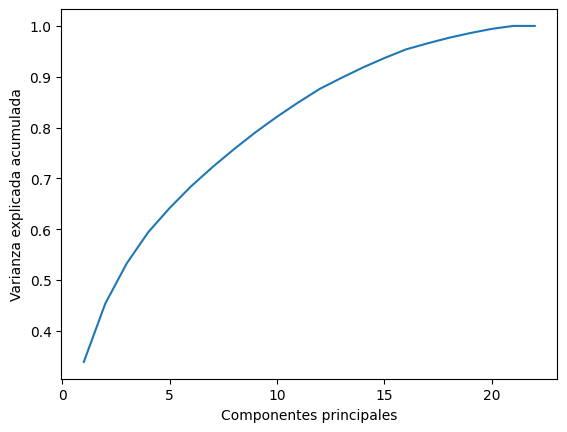

In [74]:
sns.lineplot(x=range(1, num_variables1 + 1), y=pca1.explained_variance_ratio_.cumsum())
plt.xlabel("Componentes principales")
plt.ylabel("Varianza explicada acumulada")

Se observa que en el componente 9 se llega a un variabilidad del 79.09% y en el componente 14 llega al 91.83%

Extraer Componentes

In [75]:
pca1 = PCA(13)
pca1.fit(scale_feature1)

PCA(n_components=13)

In [76]:
pd.DataFrame(pca1.components_.T, index=datos_sin_atipicos.columns)

,0,1,2,3,4,5,6,7,8,9,10,11,12
Income,0.321931,-0.007668,-0.041421,-0.152249,0.014120,0.050162,0.260382,0.010622,0.016157,0.030955,-0.011713,-0.069228,-0.084919
MntWines,0.293005,0.127081,0.215311,-0.144487,0.002717,0.039504,0.192471,0.102540,-0.113764,-0.053237,-0.058470,-0.101103,0.234418
MntFruits,0.258443,-0.139208,-0.136717,0.115371,0.008843,-0.078380,-0.348193,-0.045028,0.031958,-0.229728,-0.145522,0.156750,-0.002478
MntMeatProducts,0.304120,-0.010691,-0.130930,0.036094,0.005624,-0.062795,0.175222,-0.181717,0.238309,0.063404,0.001728,0.068074,0.394952
MntFishProducts,0.267385,-0.136038,-0.151770,0.100981,-0.022447,-0.076493,-0.353856,-0.067570,-0.013128,0.050893,-0.004519,0.192705,0.173518
MntSweetProducts,0.259344,-0.104619,-0.131520,0.070965,-0.016586,-0.142083,-0.340456,-0.023273,-0.007798,-0.098997,-0.390414,0.099547,-0.226377
MntGoldProds,0.213449,-0.088600,0.150517,0.231305,-0.070597,0.026124,-0.253989,0.477300,0.016828,0.018743,0.711711,0.059898,-0.075683
NumDealsPurchases,-0.037228,-0.096857,0.578937,0.028365,0.013776,-0.274459,0.053098,-0.061817,0.496458,0.284364,-0.111371,0.329721,-0.272556
NumWebPurchases,0.209458,-0.085470,0.451006,-0.001577,0.007352,-0.130892,-0.013491,0.169211,-0.264014,-0.139065,-0.153313,-0.363895,0.173138
NumCatalogPurchases,0.306198,-0.026050,0.005739,0.051729,0.001865,0.072194,0.256262,-0.094934,0.194363,0.187613,0.105883,0.161372,0.320904


**Componente 0:** La variable Income es la que tiene la relación más alta entre todas las variables (0.321931). Las variables que le siguen son NumCatalogPurchases	(0.306198) y MntMeatProducts	(0.304120).

**Componente 1:** Las variables MntWines (0.127081), AcceptedCmp5	(0.440279), AcceptedCmp4	(0.317622). Donde se puede ver que la mayoría de las campañas tienen una relación positiva y la mayoria de las variables del componente 1 son negativas lo puede muestra la poca relación que hay de las variables en este componente.


<Axes: >

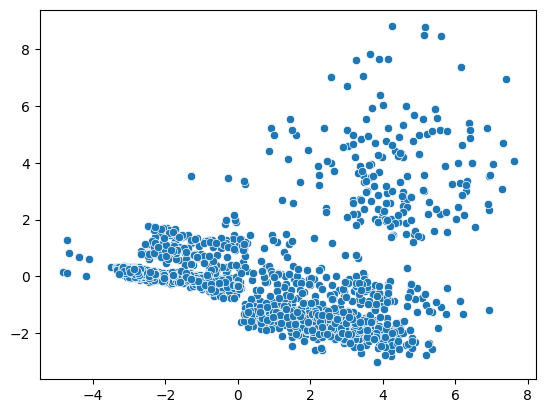

In [77]:
z_componentes1= pca1.fit_transform( scale_feature1)

sns.scatterplot( x=z_componentes1[:,0], y=z_componentes1[:,1])

  ### b. Con las componentes obtenidas implemente el algoritmo de clúster jerárquico y K-means.

#### Datos iniciales (numericos)

K-Means

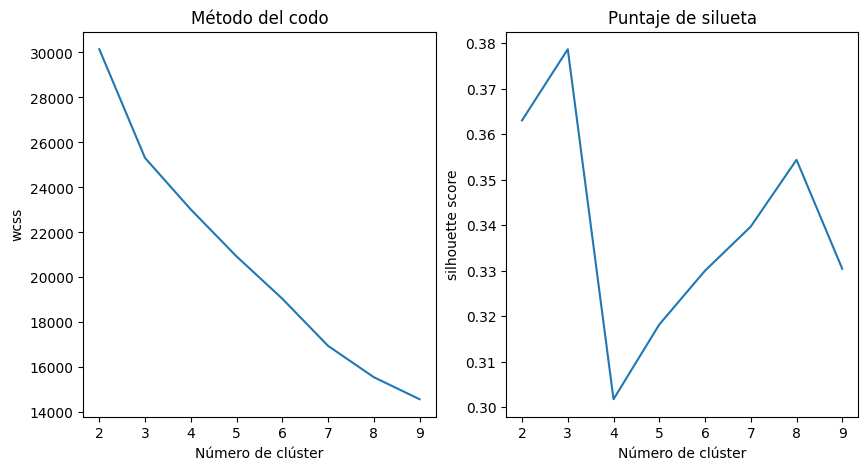

In [78]:
silueta_score=[] # puntaje de silueta
wcss =[]
n_clusters= range( 2,10)
for k in n_clusters:
  k_means=KMeans(k, random_state=123)
  k_means.fit(z_componentes)
  wcss.append(k_means.inertia_ )
  silueta = silhouette_score(z_componentes, k_means.labels_)
  silueta_score.append(silueta)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(n_clusters,wcss)
axs[0].set_title("Método del codo")
axs[0].set_xlabel("Número de clúster" )
axs[0].set_ylabel("wcss" )
axs[1].plot( n_clusters,silueta_score)
axs[1].set_title("Puntaje de silueta")
axs[1].set_xlabel("Número de clúster" )
axs[1].set_ylabel("silhouette score" )
plt.show()

In [79]:
k_means=KMeans(3, random_state=123  )
k_means.fit(z_componentes)
numericos["labels_k_means"]= k_means.labels_

Hierarchical clustering

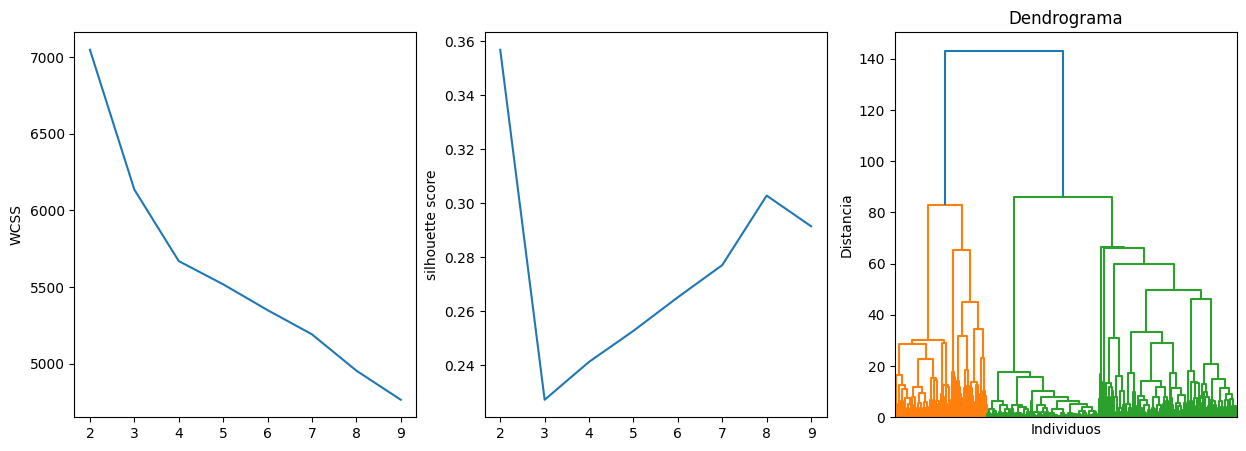

In [80]:
silueta =[]
wcss =[]
n_cluster=range(2,10)
for i in n_cluster:
  jerarquico = AgglomerativeClustering(i)
  jerarquico.fit(z_componentes)
  scaled_temp= pd.DataFrame(z_componentes)
  scaled_temp["labels"]=jerarquico.labels_
  centros= scaled_temp.groupby("labels").mean()  # obteniendo centros
  argmin, distance =pairwise_distances_argmin_min(z_componentes,centros  )  # obteniendo distancias
  wcss.append(np.sum(distance) )
  score = silhouette_score(z_componentes,jerarquico.labels_ )
  silueta.append(score)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].plot( (n_cluster), wcss  )
axes[0].set_ylabel("WCSS")
axes[1].plot( (n_cluster), silueta  )
axes[1].set_ylabel("silhouette score")

# visualización clustering jerarquico
dist_matrix = linkage(z_componentes, method='ward')
# Visualizar el dendrograma
dendrogram(dist_matrix,no_labels=True)
axes[2].set_title('Dendrograma')
axes[2].set_xlabel('Individuos')
axes[2].set_ylabel('Distancia')
plt.show()

In [82]:
hc=AgglomerativeClustering(3 )
hc.fit(z_componentes)
numericos["labels_hc"]= hc.labels_

### c. Determine el número de clústeres para K-means y clúster jerárquico.

**K-Means:**
- Visualizando el gráfico K-Means para los datos **numericos**, podemos ver que en el gráfico del codo, número 3 es donde se ve el ángulo del codo.
- Por otro lado para el score de silueta el punto más alto del gráfico es el número 3.

**Clúster Jerárquico:**
- Para el gráfico del codo los ángulos más pronunciados son para los números 3 y 4.
- Para el score de silueta los puntos más altos son el 2 y el 8.
- Visualizando el mejor lugar para realizar el corte es 4.

- Para los datos sin editar (numericos) se eligiran 3 clústeres ya que es el número que tiene más concordancia entre los métodos.

#### Datos sin Atípicos:

K-Means

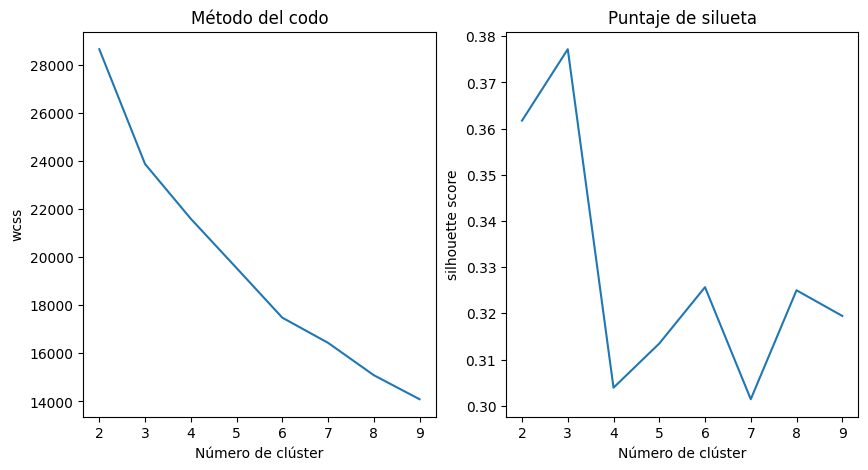

In [83]:
silueta_score=[] # puntaje de silueta
wcss =[]
n_clusters= range( 2,10)
for k in n_clusters:
  k_means=KMeans(k, random_state=123)
  k_means.fit(z_componentes1)
  wcss.append(k_means.inertia_ )
  silueta = silhouette_score(z_componentes1, k_means.labels_)
  silueta_score.append(silueta)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(n_clusters,wcss)
axs[0].set_title("Método del codo")
axs[0].set_xlabel("Número de clúster" )
axs[0].set_ylabel("wcss" )
axs[1].plot( n_clusters,silueta_score)
axs[1].set_title("Puntaje de silueta")
axs[1].set_xlabel("Número de clúster" )
axs[1].set_ylabel("silhouette score" )
plt.show()

In [85]:
k_means=KMeans(4, random_state=123  )
k_means.fit(z_componentes1)
datos_sin_atipicos["labels_k_means"]= k_means.labels_

Hierarchical clustering

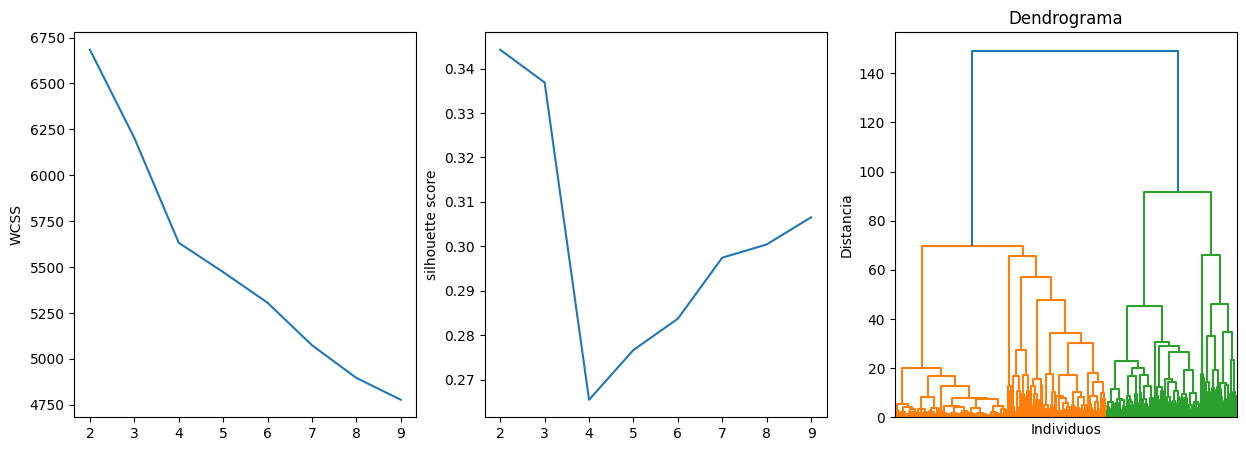

In [86]:
silueta =[]
wcss =[]
n_cluster=range(2,10)
for i in n_cluster:
  jerarquico = AgglomerativeClustering(i)
  jerarquico.fit(z_componentes1)
  scaled_temp= pd.DataFrame(z_componentes1)
  scaled_temp["labels"]=jerarquico.labels_
  centros= scaled_temp.groupby("labels").mean()  # obteniendo centros
  argmin, distance =pairwise_distances_argmin_min(z_componentes1,centros  )  # obteniendo distancias
  wcss.append(np.sum(distance) )
  score = silhouette_score(z_componentes1,jerarquico.labels_ )
  silueta.append(score)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].plot( (n_cluster), wcss  )
axes[0].set_ylabel("WCSS")
axes[1].plot( (n_cluster), silueta  )
axes[1].set_ylabel("silhouette score")

# visualización clustering jerarquico
dist_matrix = linkage(z_componentes1, method='ward')
# Visualizar el dendrograma
dendrogram(dist_matrix,no_labels=True)
axes[2].set_title('Dendrograma')
axes[2].set_xlabel('Individuos')
axes[2].set_ylabel('Distancia')
plt.show()

In [87]:
hc=AgglomerativeClustering(4)
hc.fit(z_componentes1)
datos_sin_atipicos["labels_hc"]= hc.labels_

### c. Determine el número de clústeres para K-means y clúster jerárquico

**K-Means:**
- Para los datos sin atípicos, podemos ver que el ángulo del codo es más pronunciado en el número 3 y 6.
- Para el score de silueta podemos ver que el punto más alto es 3 y luego le seguirian el 6 y el 8.


**Clúster Jerárquico:**
- se puede ver que el ángulo del codo es en número de 4 y no se visualiza ninguna otra pronunciación.
- Para el score de silueta el punto más alto es el 2, seguido del 3.
- Para el dendrograma el lugar del corte más oportuno es 4.

- Para los daton sin atípicos el número de clústeres más óptimo es 4.

###d. Para cada algoritmo obtenga la distribución de los clústeres.

#### Distribución datos iniciales.

Para la distribución de los clústeres de esta base de datos **numericos** con el método de K-Means.

,proportion
labels_k_means,
1,57.637939
0,33.652531
2,8.709530


Text(0.5, 1.0, 'Clúster con K-means')

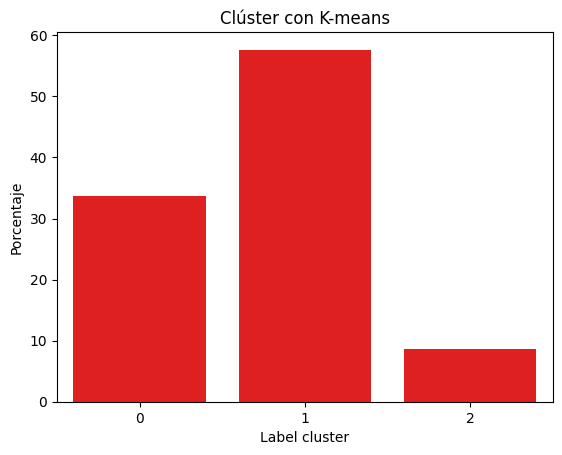

In [94]:
display(numericos['labels_k_means'].value_counts(normalize=True)*100)
sns.barplot(numericos['labels_k_means'].value_counts(normalize=True)*100, color="red")
plt.xlabel("Label cluster")
plt.ylabel("Porcentaje")
plt.title("Clúster con K-means")

Para la distribución de los clústeres de la base de datos **datos_sin_atipicos** con el método Clúster Jerárquico

,proportion
labels_hc,
3,32.995392
1,29.078341
2,27.235023
0,10.691244


Text(0.5, 1.0, 'Clúster con Hierarchical clustering')

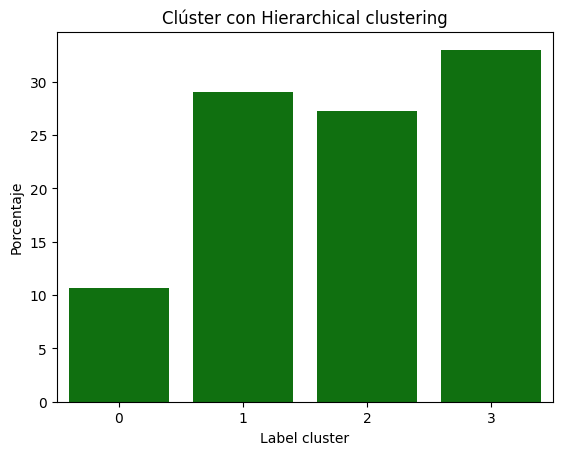

In [95]:
display( datos_sin_atipicos["labels_hc"].value_counts(normalize=True)*100)
sns.barplot(datos_sin_atipicos["labels_hc"].value_counts(normalize=True)*100, color='green')
plt.xlabel("Label cluster")
plt.ylabel("Porcentaje")
plt.title("Clúster con Hierarchical clustering")

## 6. Preguntas:

**¿Observa alguna diferencia a la hora de eliminar los datos atípicos?**

Sí, al eliminar los datos atípicos se observan diferencias importantes en los resultados. Los datos atípicos, tienden a afectar la distribución de los clísterues. Generando que los modelos de clusteres produscan resultados menos representativos.

La eliminación de los datoa atípicos permite que las variables se estabilicen, los grupos son más compantos lo que genera un redimiento en el modelo.

 **¿observa alguna diferencia implementando componentes principales? Comente las diferencias.**

 Los componentes ayudan a reducir la dimesionalidad, preservndo la mayor cantidad de variabilidad en los datos, prermitiendo trabajar con los datos más compactos.

 Las estar los datos más compactos y limpios la distribución de los datos es mucho más clara al momento de realizar los modelos de clústering, mejorando así el rendimiento del modelo y la calidad al momento de realizar el análisis.

